# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | assai
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | aldan
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | rocky mountain house
Processing Record 7 of Set 1 | oranjemund
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | bikenibeu village
Processing Record 10 of Set 1 | colac
Processing Record 11 of Set 1 | remire-montjoly
Processing Record 12 of Set 1 | severo-yeniseyskiy
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | barbezieux-saint-hilaire
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | bonthe
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | adamstown
P

In [2]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'pd' is not defined

In [5]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,300.73,100,75,3.60,MP,1690037032
1,assai,-23.3733,-50.8414,295.07,48,0,4.33,BR,1690037032
2,aldan,58.6031,125.3894,287.46,90,67,2.59,RU,1690037033
3,grytviken,-54.2811,-36.5092,269.92,94,100,0.98,GS,1690037033
4,rocky mountain house,52.3668,-114.9188,289.21,88,36,0.51,CA,1690036801


In [1]:
# Export the City_Data into a csv
city_data_df["Max Temp"] = city_data_df['Max Temp']-273.15
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df["Max Temp"] = city_data_df(["Max Temp"].values() - 273.15)
city_data_df["Max Temp"] = city_data_df['Max Temp']-273.15
 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,27.58,100,75,3.60,MP,1690037032
1,assai,-23.3733,-50.8414,21.92,48,0,4.33,BR,1690037032
2,aldan,58.6031,125.3894,14.31,90,67,2.59,RU,1690037033
3,grytviken,-54.2811,-36.5092,-3.23,94,100,0.98,GS,1690037033
4,rocky mountain house,52.3668,-114.9188,16.06,88,36,0.51,CA,1690036801


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

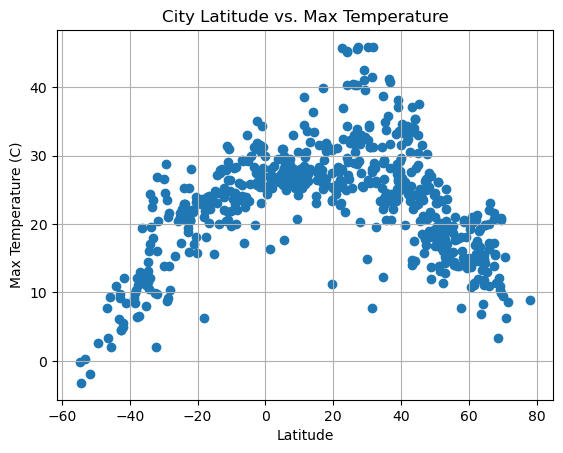

In [8]:
#Buile the scatter plot for latitude versus max temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

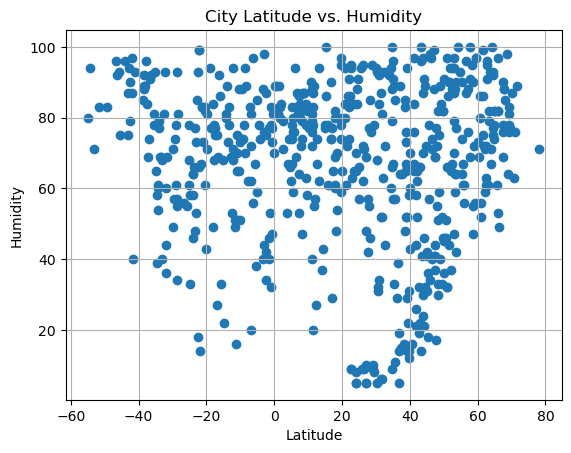

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

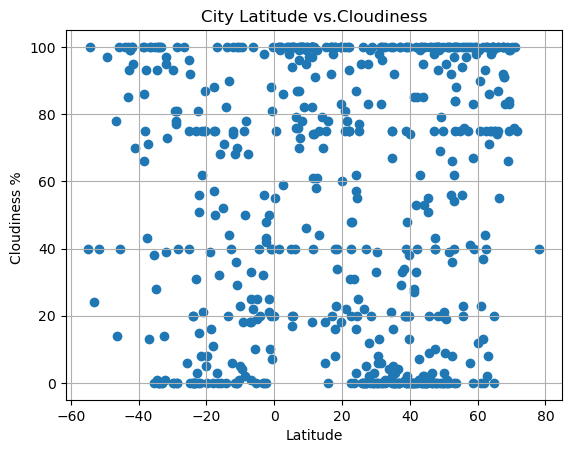

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")
plt.title("City Latitude vs.Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

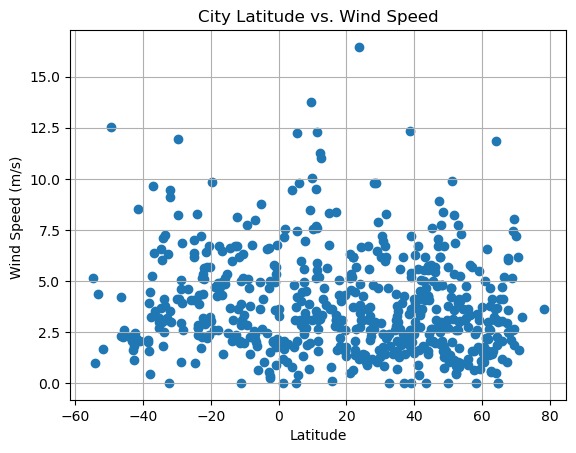

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s) ")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = 0.4051633746825451x + 9.817682971312312.
 The r-value for Max Temperature (C) versus latitude is 0.10289318273238555.


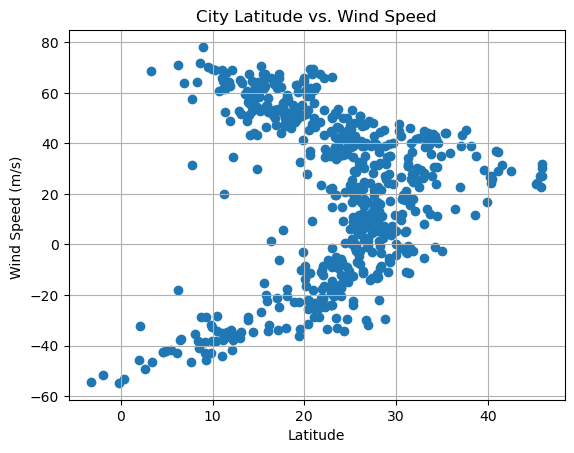

In [13]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude

x_values = city_data_df["Max Temp"]
y_values = city_data_df["Lat"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s) ")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Max Temperature (C) versus latitude is {rvalue}.")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,27.58,100,75,3.60,MP,1690037032
2,aldan,58.6031,125.3894,14.31,90,67,2.59,RU,1690037033
4,rocky mountain house,52.3668,-114.9188,16.06,88,36,0.51,CA,1690036801
6,bikenibeu village,1.3673,173.1241,26.98,89,100,0.00,KI,1690037034
8,remire-montjoly,4.9167,-52.2667,31.02,62,40,3.09,GF,1690037034


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,assai,-23.3733,-50.8414,21.92,48,0,4.33,BR,1690037032
3,grytviken,-54.2811,-36.5092,-3.23,94,100,0.98,GS,1690037033
5,oranjemund,-28.5500,16.4333,13.89,57,100,3.92,NaN,1690037033
7,colac,-38.3333,143.5833,8.43,89,86,1.57,AU,1690037034
11,papatowai,-46.5619,169.4708,7.67,96,78,4.21,NZ,1690037035


###  Temperature vs. Latitude Linear Regression Plot

 The r-value for Max Temperature (C) versus latitude is -0.5859499572890865.


Text(20, 5, 'y = -0.24x +33.3')

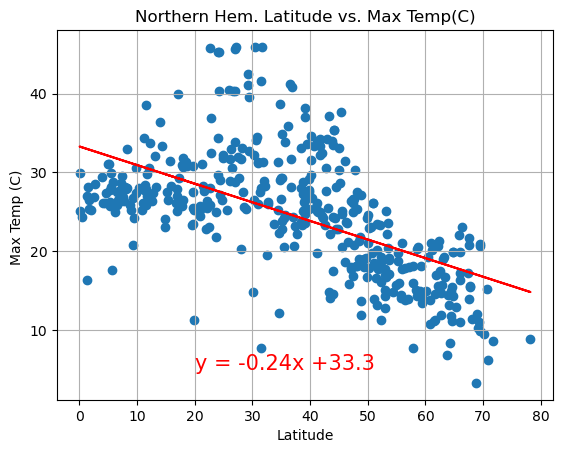

In [16]:
# Linear regression on Northern Hemisphere
y_values = northern_hemi_df['Max Temp']
x_values = northern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C) ")
plt.title("Northern Hem. Latitude vs. Max Temp(C)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Max Temperature (C) versus latitude is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")





 The r-value for Latitude vs. Max Temperature (C) is 0.8367738034636591.


Text(-50, 32, 'y = 0.49x +30.39')

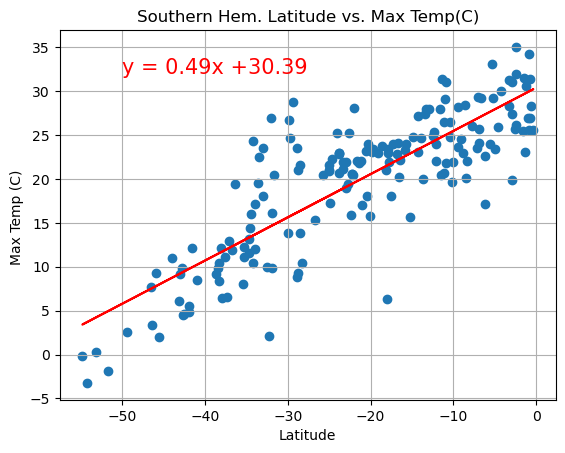

In [31]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df['Max Temp']
x_values = southern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C) ")
plt.title("Southern Hem. Latitude vs. Max Temp(C)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Max Temperature (C) is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(-50,32),fontsize=15,color="red")

**Discussion about the linear relationship:** There appears to be a stronger linear relationship between latitude and maximum temperature when we are looking at the Southern Hemisphere. There is still a relationship in the Northern Hemisphere, but predictably, it is a negative one. As the latitude increases we are moving farther North, which in the Northern Hemisphere means cooler temps but in the Southern Hemisphere we move closer to the equator, increasing temps. 

### Humidity vs. Latitude Linear Regression Plot

 The r-value for Latitude vs. Humidity is 0.02626535777133786.


Text(40, 5, 'y = 0.03x +65.01')

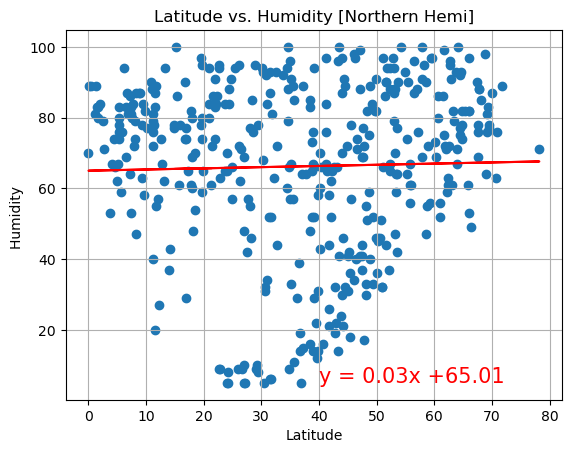

In [18]:
# Northern Hemisphere
y_values = northern_hemi_df['Humidity']
x_values = northern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.title("Latitude vs. Humidity [Northern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Humidity is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(40,5),fontsize=15,color="red")

 The r-value for Latitude vs. Humidity is -0.2400752110319641.


Text(-55, 5, 'y = -0.33x +62.46')

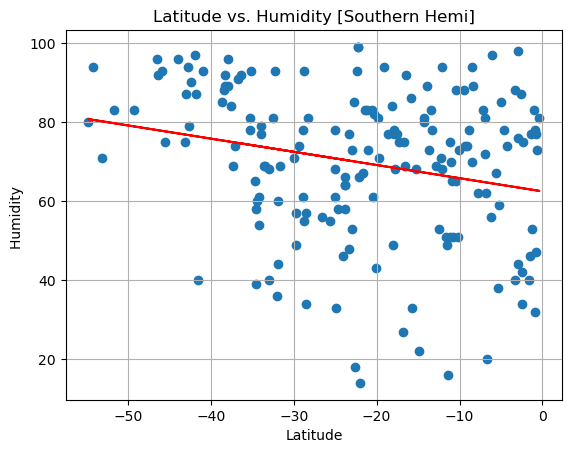

In [19]:
# Southern Hemisphere
y_values = southern_hemi_df['Humidity']
x_values = southern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.title("Latitude vs. Humidity [Southern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Humidity is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

**Discussion about the linear relationship:** Again, the Southern Hemisphere has the stronger relationship, though neither is greatly linearly associated.

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value for Latitude vs. Humidity is -0.2772992489225942.


Text(-55, 5, 'y = -0.76x +30.95')

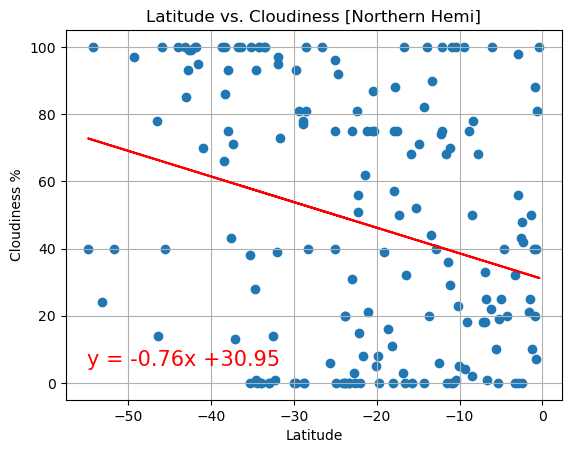

In [20]:
# Northern Hemisphere
y_values = southern_hemi_df['Cloudiness']
x_values = southern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness [Northern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Humidity is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

 The r-value for Latitude vs. Humidity is -0.2400752110319641.


Text(-50, 20, 'y = -0.33x +62.46')

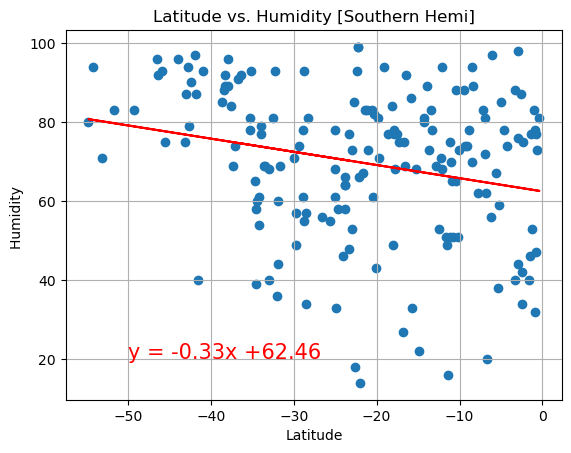

In [23]:
# Southern Hemisphere
y_values = southern_hemi_df['Humidity']
x_values = southern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.title("Latitude vs. Humidity [Southern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Humidity is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

**Discussion about the linear relationship:** There is very little association between the cloud cover of a city and it's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value for Latitude vs. Wind Speed is -0.1371564989934919.


Text(40, 15, 'y = -0.02x +4.33')

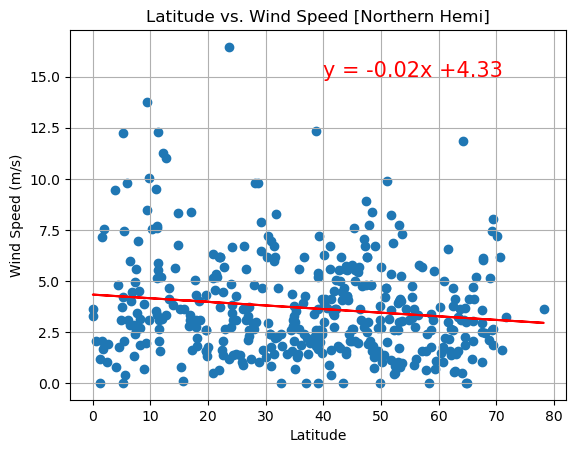

In [29]:
# Northern Hemisphere
y_values = northern_hemi_df['Wind Speed']
x_values = northern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed [Northern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Wind Speed is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

 The r-value for Latitude vs. Wind Speed is -0.024985947212683702.


Text(-20, 12, 'y = -0.0x +3.98')

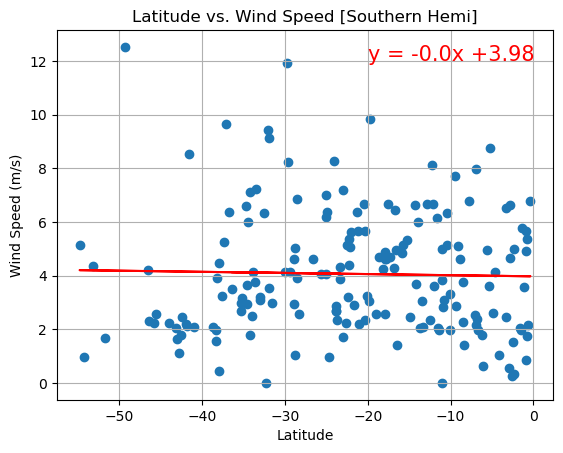

In [28]:
# Southern Hemisphere
y_values = southern_hemi_df['Wind Speed']
x_values = southern_hemi_df['Lat']




# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed [Southern Hemi]")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

#print(f"y = {slope}x + {intercept}.")
print(f" The r-value for Latitude vs. Wind Speed is {rvalue}.")



line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(-20,12),fontsize=15,color="red")

**Discussion about the linear relationship:** Based on the collected data, the relationship between latitude and wind speed in a city is very weak. There is a vaguely negative trend in the Northern Hemisphere as we move away from the equator, while the Southern Hemisphere is extremly unpredictable.